## Working file for the quizz

In [179]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
# loading EDHEC hedge fund data since 2000 with basic plotting
hfi = erk.get_hfi_returns()
hfi_dist_sec_strat = hfi["Distressed Securities"]
hfi_dist_sec_strat_from_2000 = hfi_dist_sec_strat["2000":]
hfi_dist_sec_strat_from_2000

date
2000-01    0.0088
2000-02    0.0421
2000-03    0.0103
2000-04   -0.0101
2000-05   -0.0132
            ...  
2018-07    0.0093
2018-08    0.0002
2018-09    0.0050
2018-10   -0.0158
2018-11   -0.0193
Freq: M, Name: Distressed Securities, Length: 227, dtype: float64

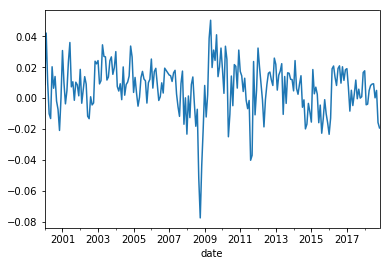

In [181]:
hfi_dist_sec_strat_from_2000.plot()

In [182]:
# question 1
# Monthly Gaussian VaR at 1% level
(erk.var_gaussian(hfi_dist_sec_strat_from_2000, level=1)*100).round(2)

3.1400000000000001

In [183]:
# question 2
# Monthly modified or Cornish-Fisher VaR at 1% level
(erk.var_gaussian(hfi_dist_sec_strat_from_2000, level=1, modified=True)*100).round(2)

4.9699999999999998

In [184]:
# question 3
# Monthly historic VaR at 1% level
(erk.var_historic(hfi_dist_sec_strat_from_2000, level=1)*100).round(2)

4.2599999999999998

In [185]:
# loading the 30 industry return from 2013 to 2017 with basic descriptive statistics
ind = erk.get_ind_returns()
ind_5y_period = ind["2013":"2017"]
ind_5y_period_portfolio = ind_5y_period[["Books", "Steel", "Oil","Mines"]]
ind_5y_period_portfolio.describe()

,Books,Steel,Oil,Mines
count,60.000000,60.000000,60.000000,60.000000
mean,0.008937,0.010118,0.003397,0.002958
std,0.052154,0.066265,0.051929,0.072330
min,-0.102600,-0.105900,-0.100300,-0.131000
25%,-0.018950,-0.039600,-0.034750,-0.057000
50%,0.002600,0.014800,0.005500,-0.002650
75%,0.038975,0.041075,0.029725,0.055775
max,0.122100,0.213600,0.125200,0.157700


In [186]:
# question 5
ptf_cov = ind_5y_period_portfolio.cov()
ptf_cov

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [187]:
import numpy as np
annualized_riskfree_rate = erk.annualize_rets(np.array([0.1]), 1/5)
annualized_riskfree_rate

0.019244876491456564

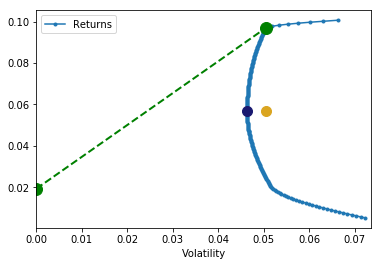

In [188]:
# erk.plot_ef(n_points=200, er=ind_5y_period_portfolio, cov=ptf_cov, riskfree_rate=0.1)
annualized_rets = erk.annualize_rets(ind_5y_period_portfolio, 12)
annualized_vol = erk.annualize_vol(ind_5y_period_portfolio, 12)
erk.plot_ef(n_points=200, er=annualized_rets, cov=ptf_cov, riskfree_rate=annualized_riskfree_rate, show_cml=True, show_ew=True, show_gmv=True)

In [189]:
# Question 5 - changing with no annulization of riskfree rate
# import numpy as np
# annualized_riskfree_rate = erk.annualize_rets(np.array([0.1]), 1/5)
# annualized_riskfree_rate
pd.DataFrame({"Returns":annualized_rets,
              "Volatility":annualized_vol, 
              "weights from msr":(erk.msr(0.1,annualized_rets, ptf_cov)*100).round(2)
             })

,Returns,Volatility,weights from msr
Books,0.095312,0.180668,0.0
Steel,0.100716,0.229550,100.0
Oil,0.025275,0.179889,0.0
Mines,0.005136,0.250560,0.0


In [198]:
# question 8
pd.DataFrame({"Returns":annualized_rets,
              "Volatility":annualized_vol, 
              "weights from GMV":(erk.gmv(ptf_cov)*100).round(2)
             })

,Returns,Volatility,weights from GMV
Books,0.095312,0.180668,47.70
Steel,0.100716,0.229550,0.00
Oil,0.025275,0.179889,43.41
Mines,0.005136,0.250560,8.89


In [194]:
#Question 11
w_msr = erk.msr(0.1,annualized_rets, portf_4ind_since2018_cov)
w_msr

array([  1.28543010e-13,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00])

In [195]:
portf_4ind_since2018_vol =  erk.portfolio_vol(w_msr, portf_4ind_since2018_cov)
portf_4ind_since2018_vol_annualized = ((portf_4ind_since2018_vol*(12**0.5))*100).round(2)
(portf_4ind_since2018_vol*100).round(2), portf_4ind_since2018_vol_annualized

(6.3499999999999996, 21.98)

In [196]:
#Question 12
w_gmv = erk.gmv(ptf_cov)
w_gmv

array([  4.77024870e-01,   4.33680869e-19,   4.34112024e-01,
         8.88631053e-02])

In [197]:
portf_4ind_since2018_vol =  erk.portfolio_vol(w_gmv, portf_4ind_since2018_cov)
portf_4ind_since2018_vol_annualized = ((portf_4ind_since2018_vol*(12**0.5))*100).round(2)
(portf_4ind_since2018_vol*100).round(2), portf_4ind_since2018_vol_annualized

(5.4800000000000004, 18.969999999999999)